<a href="https://colab.research.google.com/github/TruongVanDuc19146177/Project-Cuoi-Ky/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_h%E1%BA%A1t_gi%E1%BB%91ng_Tr%C6%B0%C6%A1ng_V%C4%83n_%C4%90%E1%BB%A9c_19146177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ket noi voi drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/dataAI

/content/drive/MyDrive/dataAI


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/dataAI/Train',
target_size=(150,150), batch_size=32, class_mode='categorical')
# Tạo bộ dữ liệu test set 
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/dataAI/Test',
target_size=(150,150), batch_size=32, class_mode='categorical')
 


Found 2747 images belonging to 15 classes.
Found 625 images belonging to 15 classes.


In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform',
padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Huấn luyện mô hình 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1,
                  validation_data=test_set,callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
13/86 [===>..........................] - ETA: 8:23 - loss: 5.3441 - accuracy: 0.1010

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


41/86 [=============>................] - ETA: 5:55 - loss: 3.4501 - accuracy: 0.1220

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


86/86 [==============================] - 859s 10s/step - loss: 2.7980 - accuracy: 0.1893 - val_loss: 1.7704 - val_accuracy: 0.3840
Epoch 2/50
86/86 [==============================] - 40s 456ms/step - loss: 1.8155 - accuracy: 0.3786 - val_loss: 1.4554 - val_accuracy: 0.4352
Epoch 3/50
86/86 [==============================] - 40s 464ms/step - loss: 1.5391 - accuracy: 0.4838 - val_loss: 1.3840 - val_accuracy: 0.5040
Epoch 4/50
86/86 [==============================] - 40s 461ms/step - loss: 1.4705 - accuracy: 0.4947 - val_loss: 1.3562 - val_accuracy: 0.4976
Epoch 5/50
86/86 [==============================] - 41s 478ms/step - loss: 1.3059 - accuracy: 0.5548 - val_loss: 1.2343 - val_accuracy: 0.5616
Epoch 6/50
86/86 [==============================] - 40s 464ms/step - loss: 1.2388 - accuracy: 0.5799 - val_loss: 1.0822 - val_accuracy: 0.5856
Epoch 7/50
86/86 [==============================] - 40s 468ms/step - loss: 1.1540 - accuracy: 0.6105 - val_loss: 1.1245 - val_accuracy: 0.6240
Epoch 8/50


In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print(Score)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.10224110633134842, 0.9719694256782532]


In [ ]:
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10224110633134842
Train Accuracy 0.9719694256782532


<function matplotlib.pyplot.show>

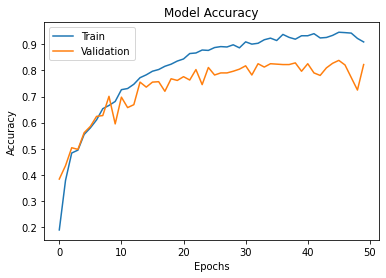

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("/content/drive/MyDrive/dataAI/hatgiong.h5")

In [ ]:
#ket noi voi drive
from google.colab import drive
drive.mount('/content/drive')
 

In [ ]:
 # Tải mô hình 
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/dataAI/hatgiong.h5")

In [ ]:
y_pred=model.predict(test_set)

a = training_set.class_indices
X=[]
Y=[]

for num,classes in a.items():
  X.append(num)
  Y.append(classes)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


'Cashew'

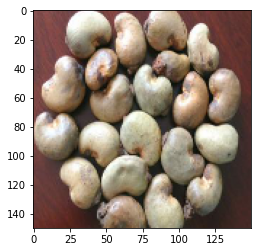

In [ ]:
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename = '/content/19.jpg'

img = load_img(filename, target_size =(150,150))
plt.imshow(img)
img  = img_to_array(img)
img  = img.reshape(1,150,150,3)
img = img/255
label = int(np.argmax(model.predict(img), axis = 1))


X[label]

In [ ]:
a


{'Basil_seed': 0,
 'Beets': 1,
 'Cabbage': 2,
 'Carrot': 3,
 'Cashew': 4,
 'Chia_seed': 5,
 'Corn_kernel': 6,
 'Mung_bean': 7,
 'Paddy_grain': 8,
 'Peanut': 9,
 'Peas': 10,
 'Pumpkin_seed': 11,
 'Red_bean': 12,
 'Sun_flower': 13,
 'Tomato': 14}